In [9]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [8]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

In [3]:
load_dotenv()

True

In [6]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [10]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51852.00
The current value of your 5.3 ETH is $15454.91


In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA')
alpaca_secret_key=os.getenv('ALPACA_Security')

In [18]:
alpaca_api_key='PKNDAQBNNPA308UENMG0'

In [19]:
alpaca_secret_key='LAVf3c9QnwcI8Pbco2y2sPpMtFIwwn2YBUgZYR13'

In [21]:
# Create the Alpaca API object
alpaca=tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [26]:
# Format current date as ISO format
today = pd.Timestamp("2021-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
closing_price = alpaca.get_barset(tickers, timeframe, end=today, limit=1000).df.sort_index()

# Preview DataFrame
closing_price.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-08-17 00:00:00-04:00  109.83  110.02  109.78  110.010  2033497  246.24   
2017-08-18 00:00:00-04:00  110.05  110.14  109.89  109.965  1453298  242.90   
2017-08-21 00:00:00-04:00  110.01  110.09  109.97  110.030  1606116  242.64   
2017-08-22 00:00:00-04:00  109.99  110.00  109.87  109.910  1596701  243.58   
2017-08-23 00:00:00-04:00  110.08  110.19  110.01  110.180  1696538  244.35   

                                                               
                              high     low    close    volume  
time                                                           
2017-08-17 00:00:00-04:00  246.600  243.10  243.130  89435117  
2017-08-18 00:00:00-04:00  244.189  242.20  242.690  85934699  
2017-08-21 00:00:00-04:00  243.200  241.83  242.930  47802190  
2017-08-22 00:00:00-04:00  245.620  243.55  245.400  49424448  
2017-08-23 00:00:00-04:00  245.050  244.16  244.538  33779990

In [27]:
# Pick AGG and SPY close prices
agg_close_price = closing_price["AGG"]["close"][0]
spy_close_price = closing_price["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $110.01
Current SPY closing price: $243.13


In [29]:
# Compute the current value of shares
agg_value = my_agg * agg_close_price
spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $12156.50
The current value of your 200 AGG shares is $22002.00


In [32]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
crypto=my_btc_value +my_eth_value
shares=agg_value+spy_value

# Create savings DataFrame
df_savings=pd.DataFrame([crypto, shares], index=['crypto','shares'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,67306.906
shares,34158.500


<AxesSubplot:title={'center':'composition of personal savings'}, ylabel='amount'>

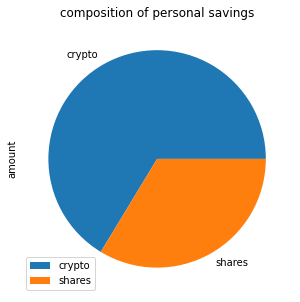

In [37]:
# Plot savings pie chart
df_savings.plot.pie(figsize=(5,5),y='amount', title='composition of personal savings')

In [40]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_of_savings=crypto+shares

# Validate saving health
if emergency_fund<total_amount_of_savings:
    print('Congratulations! You are having enough money in this fund.')
elif emergency_fund==total_amount_of_savings:
    print('Congratulations! You are on reaching this financial goal.')
else:
    print('You are (emergency_fund-total_amount_of_savings) away the person is from reaching the goal. ')

Congratulations! You are having enough money in this fund.


In [41]:
 # Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [63]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_years= MCSimulation(portfolio_data = df_stock_data, weights = [0.4,0.6], num_simulation = 500, num_trading_days = 252*30)
MC_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009857,1.013734,0.997874,0.989700,0.997758,0.985985,1.000334,0.997512,0.997810,0.995160,...,1.002945,1.006153,0.997970,0.992216,1.013357,0.992563,1.011111,0.994624,1.011332,1.021920
2,1.010668,1.013053,0.993072,0.974886,1.007339,0.996620,1.001123,0.999848,1.006069,0.999592,...,0.995794,1.012031,1.013322,0.991407,1.017796,0.981921,1.006237,0.997828,1.009458,1.024654
3,1.026676,1.014812,0.982618,0.981686,1.013489,1.002758,1.010264,0.999722,1.017203,0.998463,...,1.000875,1.009729,1.006644,0.999823,1.019703,0.988218,0.999149,0.992591,1.002039,1.026550
4,1.035893,1.017602,0.984993,0.989973,1.004085,0.993323,1.008791,1.001831,1.019404,0.996931,...,1.008516,1.006348,1.005232,0.998061,1.010826,0.989096,1.006879,0.995058,1.014923,1.018746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.616580,7.491401,21.526408,10.322194,37.333322,24.979215,9.175892,48.148044,28.643743,18.502774,...,13.334740,18.813772,22.680820,5.112882,30.305232,9.397494,10.305881,8.519920,19.229878,25.237409
7557,6.687045,7.431373,21.296948,10.347352,37.385252,24.612158,9.234102,47.650206,28.991754,18.631855,...,13.357322,18.512790,22.967686,5.070135,30.308776,9.519693,10.248890,8.525217,19.132230,25.298549
7558,6.626392,7.342462,21.167228,10.318921,36.957528,24.750941,9.226850,46.893889,29.514844,18.592390,...,13.538376,18.508002,22.776967,5.001010,30.126259,9.481722,10.412871,8.586661,19.233472,25.571899
7559,6.650222,7.335014,20.967507,10.435356,37.153097,25.001081,9.264525,47.262827,29.602335,18.693823,...,13.640293,18.509835,22.867758,4.973431,30.223212,9.501875,10.299906,8.479645,19.138700,25.575260


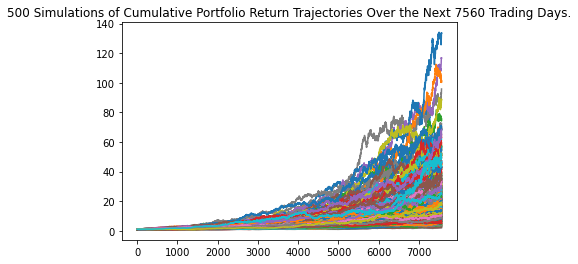

In [64]:
# Plot simulation outcomes
plot=MC_years.plot_simulation()

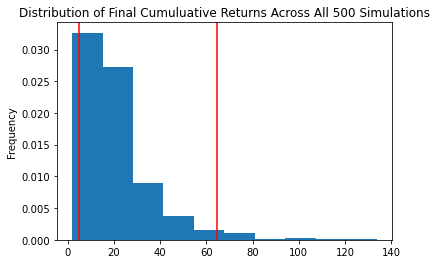

In [65]:
# Plot probability distribution and confidence intervals
Prob_plot=MC_years.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = MC_years.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean             21.552707
std              16.046744
min               1.931878
25%              11.278949
50%              17.186627
75%              26.915159
max             133.645605
95% CI Lower      4.688070
95% CI Upper     64.823508
Name: 7560, dtype: float64


In [67]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((sum_stats[8] * initial_investment), 2)
ci_upper = round((sum_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93761.4 and $1296470.15


In [68]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((sum_stats[8] * initial_investment), 2)
ci_upper = round((sum_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $140642.1 and $1944705.23
